In [275]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [151]:
try:
    conn = MongoClient()
    print('connected successfully')
except:
    print('failed to connect')

connected successfully


In [152]:
db = conn.review_sentiment_analysis

In [153]:
collection = db.movie_reviews

In [154]:
reviews = collection.find()

In [155]:
reviews_list = []
for review in reviews:
    reviews_list.append(review)

In [156]:
dic = {'_id':[],
        'movie_name':[],
        'review':[],
       'rating':[],
       }

In [157]:
for review in reviews_list:
    dic['_id'].append(review['_id'])
    dic['movie_name'].append(review['movie_name'])
    dic['review'].append(review['review'])
    dic['rating'].append(review['rating'])

In [158]:
df = pd.DataFrame(dic)

In [159]:
df.head()

,_id,movie_name,review,rating
0,614f34b7ee63d69159698e42,The Shawshank Redemption,Why do I want to write the 234th comment on Th...,10
1,614f34b7ee63d69159698e43,The Shawshank Redemption,The Shawshank Redemption is written and direct...,10
2,614f34b7ee63d69159698e44,The Shawshank Redemption,"In its Oscar year, Shawshank Redemption (writt...",10
3,614f34b7ee63d69159698e45,The Shawshank Redemption,I have never seen such an amazing film since I...,
4,614f34b7ee63d69159698e46,The Shawshank Redemption,"Can Hollywood, usually creating things for ent...",10


In [160]:
df.shape

(11219, 4)

## Analysing duplicates and NaN values

In [161]:
df.drop_duplicates(subset ='review',keep = 'first', inplace = True)


In [162]:
df.head()

,_id,movie_name,review,rating
0,614f34b7ee63d69159698e42,The Shawshank Redemption,Why do I want to write the 234th comment on Th...,10
1,614f34b7ee63d69159698e43,The Shawshank Redemption,The Shawshank Redemption is written and direct...,10
2,614f34b7ee63d69159698e44,The Shawshank Redemption,"In its Oscar year, Shawshank Redemption (writt...",10
3,614f34b7ee63d69159698e45,The Shawshank Redemption,I have never seen such an amazing film since I...,
4,614f34b7ee63d69159698e46,The Shawshank Redemption,"Can Hollywood, usually creating things for ent...",10


In [163]:
df.shape

(8723, 4)

In [164]:
df=df.replace(to_replace ="",
                 value =np.nan )

In [165]:
df.head()


,_id,movie_name,review,rating
0,614f34b7ee63d69159698e42,The Shawshank Redemption,Why do I want to write the 234th comment on Th...,10
1,614f34b7ee63d69159698e43,The Shawshank Redemption,The Shawshank Redemption is written and direct...,10
2,614f34b7ee63d69159698e44,The Shawshank Redemption,"In its Oscar year, Shawshank Redemption (writt...",10
3,614f34b7ee63d69159698e45,The Shawshank Redemption,I have never seen such an amazing film since I...,NaN
4,614f34b7ee63d69159698e46,The Shawshank Redemption,"Can Hollywood, usually creating things for ent...",10


In [166]:
df.isnull().sum()

_id             0
movie_name      0
review          0
rating        938
dtype: int64

In [167]:
df=df.dropna(axis = 0, how ='any')#replacing missing values with nan

In [168]:
df.shape

(7785, 4)

In [169]:
df = df.sample(frac = 1).reset_index(drop=False)#shuffling and reindexing

In [170]:
df.head()

,index,_id,movie_name,review,rating
0,6089,614f68bfee63d6915969a60c,Short Term 12,"After seeing this movie, I realized how the Ac...",10
1,11099,61501e96bb541ff327e496d9,The Lunchbox,An old saying repeated in Ritesh Batra's charm...,9
2,9528,61501e95bb541ff327e490b6,Harry Potter and the Prisoner of Azkaban,"If there's anything this movie proves, it is t...",8
3,1807,614f34b8ee63d69159699551,Whiplash,I saw this about 24 hours ago at the Best of F...,8
4,5856,614f68bfee63d6915969a523,Airlift,A story must to be spread #Airlift is compelli...,10


In [171]:
collection1 = db.removed_duplicates


In [188]:
len(df['movie_name'].unique())

350

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7785 entries, 0 to 7784
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       7785 non-null   int64 
 1   _id         7785 non-null   object
 2   movie_name  7785 non-null   object
 3   review      7785 non-null   object
 4   rating      7785 non-null   object
dtypes: int64(1), object(4)
memory usage: 243.3+ KB


In [195]:
df['rating'] = df['rating'].astype(int)
df

,index,_id,movie_name,review,rating
0,6089,614f68bfee63d6915969a60c,Short Term 12,"After seeing this movie, I realized how the Ac...",10
1,11099,61501e96bb541ff327e496d9,The Lunchbox,An old saying repeated in Ritesh Batra's charm...,9
2,9528,61501e95bb541ff327e490b6,Harry Potter and the Prisoner of Azkaban,"If there's anything this movie proves, it is t...",8
3,1807,614f34b8ee63d69159699551,Whiplash,I saw this about 24 hours ago at the Best of F...,8
4,5856,614f68bfee63d6915969a523,Airlift,A story must to be spread #Airlift is compelli...,10
...,...,...,...,...,...
7780,3114,614f34b9ee63d69159699a6c,Kimi no na wa.,I went in to see Kimi no Na ha without knowing...,10
7781,3749,614f34b9ee63d69159699ce7,Memento,Losing your memory would have to go close to o...,10
7782,6474,614f68c0ee63d6915969a78d,Black Swan,Darren Aronofsky proves once again that he is ...,9
7783,10598,61501e95bb541ff327e494e4,Bringing Up Baby,There are a lot of films from the 1930s and 19...,8


In [202]:
df.to_csv('removed_duplicates.csv')

## Query for finding reviews per movie - Mapreduce

In [215]:
from bson.code import Code

In [216]:
mapping = Code("function(){emit(this.movie_name, 1)}")

In [217]:
reduce = Code("function(key, value){return Array.sum(value)}")

In [218]:
result = db.removed_duplicates.map_reduce(mapping, reduce, "movie_review_count")

In [219]:
movie_review_count = db.movie_review_count.find()

In [220]:
movie_review_count_df = pd.DataFrame(movie_review_count)

In [221]:
movie_review_count_df.head()

,_id,value
0,12 Angry Men,20.0
1,Mou gaan dou,21.0
2,Almost Famous,18.0
3,Rain Man,24.0
4,Marriage Story,25.0


In [222]:
movie_review_count_df.shape

(350, 2)

<AxesSubplot:title={'center':'Movie name vs number of reviews'}, xlabel='_id', ylabel='value'>

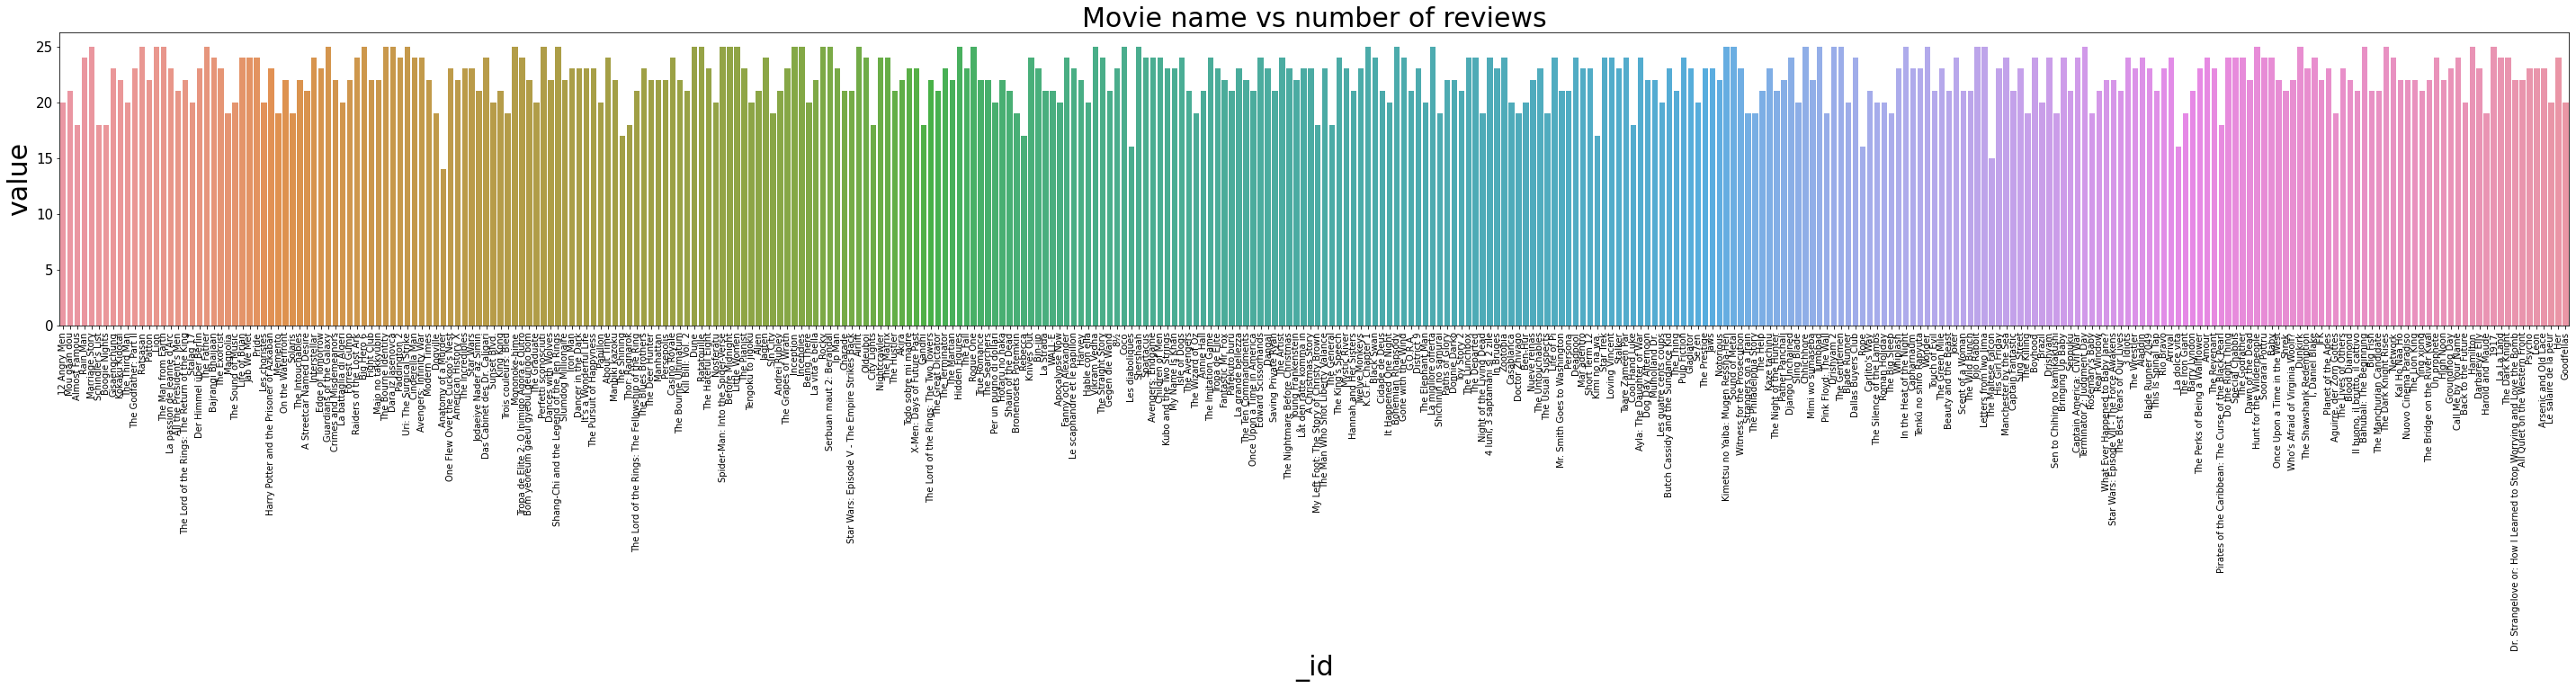

In [223]:
movie_names = movie_review_count_df['_id']
review_count = movie_review_count_df['value']
plt.figure(figsize=(50,6))
plt.title("Movie name vs number of reviews", fontsize=30)
plt.xlabel("Movie names",fontsize=30)
plt.ylabel("review count",fontsize=30)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=15)
sns.barplot(x=movie_names, y=review_count)

### Conclusions:

- There are total of 350 movies
- Most of the movies have approximately 25 reviews, some have a bit less than it 

## Query for calculating number of reviews in each rating(1 - 10) - Mapreduce

In [224]:
mapping = Code("function(){emit(this.rating, 1)}")
reduce = Code("function(key, value){return Array.sum(value)}")
result = db.removed_duplicates.map_reduce(mapping, reduce, "rating_count")

In [225]:
rating_count = db.rating_count.find()

In [226]:
rating_count_df = pd.DataFrame(rating_count)
rating_count_df.head()

,_id,value
0,10.0,3976.0
1,7.0,323.0
2,6.0,216.0
3,9.0,1500.0
4,8.0,952.0


<AxesSubplot:title={'center':'rating count'}, xlabel='_id', ylabel='value'>

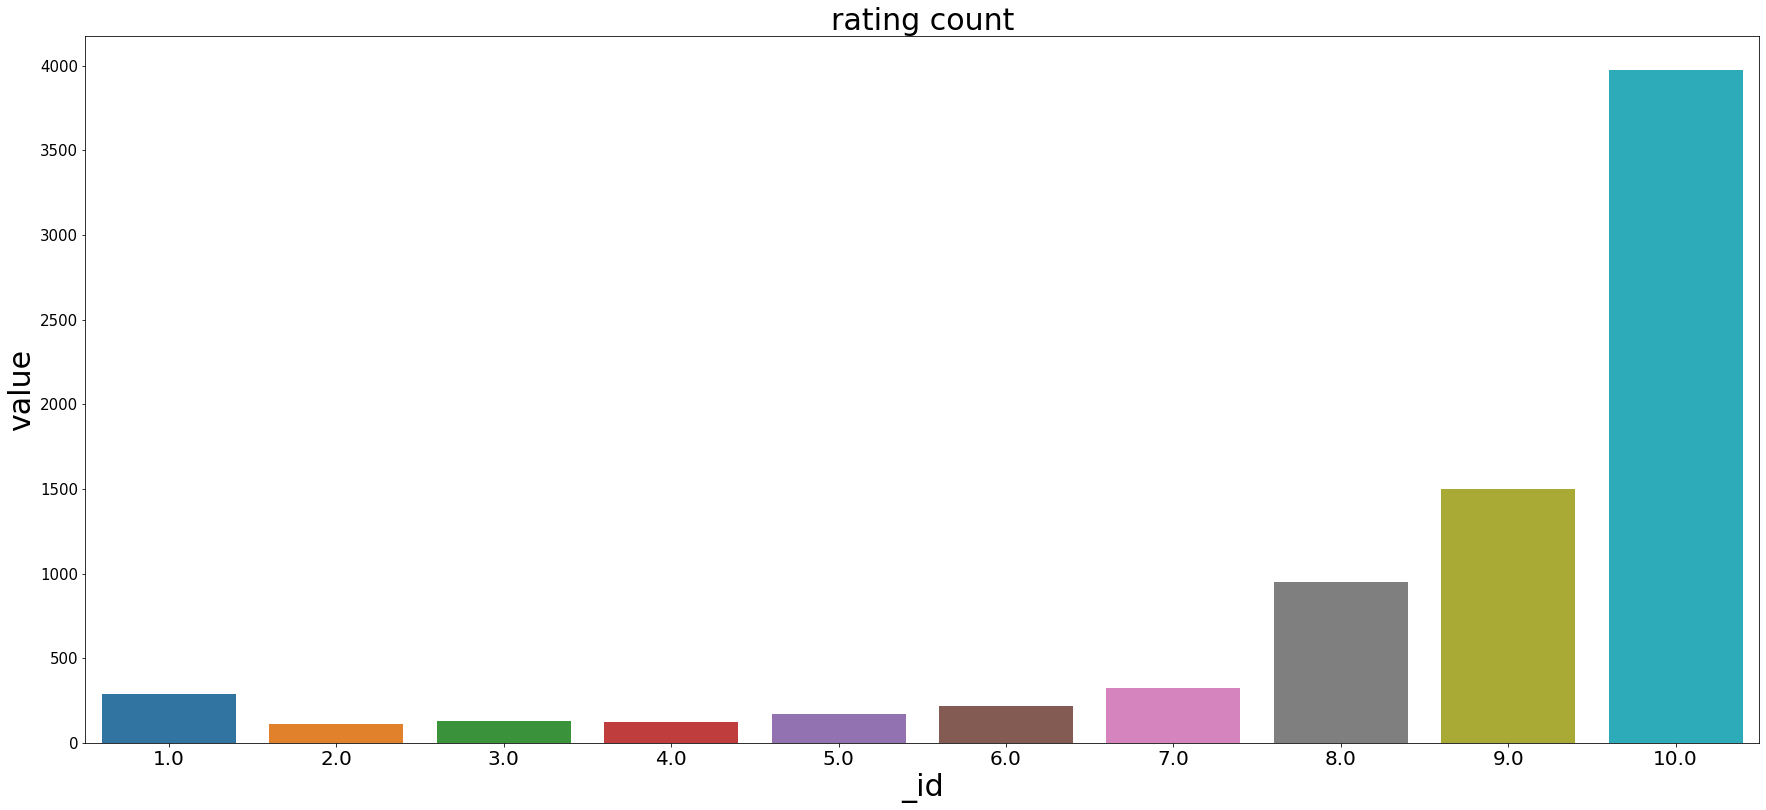

In [227]:
rating = rating_count_df['_id']
count = rating_count_df['value']
plt.figure(figsize=(30,13))
plt.title("rating count", fontsize=30)
plt.xlabel("rating",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
sns.barplot(x=rating, y=count)

In [255]:
def assign_sentiment(df):
    label=[]
    sentiment=[]
    for rating in df['rating']:
        
        if(rating >= 9):
            label.append(2)
            sentiment.append('Positive')
        elif(rating<=5):
            label.append(0)
            sentiment.append('Negative')
        else:
            label.append(1)
            sentiment.append('Neutral')
    print(len(label))
    print(len(sentiment))
    df['label']=label
    df['sentiment']=sentiment    
    return df

In [256]:
df=assign_sentiment(df)
df

7785
7785


,index,_id,movie_name,review,rating,label,sentiment
0,6089,614f68bfee63d6915969a60c,Short Term 12,"After seeing this movie, I realized how the Ac...",10,2,Positive
1,11099,61501e96bb541ff327e496d9,The Lunchbox,An old saying repeated in Ritesh Batra's charm...,9,2,Positive
2,9528,61501e95bb541ff327e490b6,Harry Potter and the Prisoner of Azkaban,"If there's anything this movie proves, it is t...",8,1,Neutral
3,1807,614f34b8ee63d69159699551,Whiplash,I saw this about 24 hours ago at the Best of F...,8,1,Neutral
4,5856,614f68bfee63d6915969a523,Airlift,A story must to be spread #Airlift is compelli...,10,2,Positive
...,...,...,...,...,...,...,...
7780,3114,614f34b9ee63d69159699a6c,Kimi no na wa.,I went in to see Kimi no Na ha without knowing...,10,2,Positive
7781,3749,614f34b9ee63d69159699ce7,Memento,Losing your memory would have to go close to o...,10,2,Positive
7782,6474,614f68c0ee63d6915969a78d,Black Swan,Darren Aronofsky proves once again that he is ...,9,2,Positive
7783,10598,61501e95bb541ff327e494e4,Bringing Up Baby,There are a lot of films from the 1930s and 19...,8,1,Neutral


In [270]:
df.to_csv("Final_Data.csv")

In [257]:
df[df['sentiment']=='Positive'].review.count()

5476

In [258]:
df[df['sentiment']=='Negative'].review.count()

818

In [259]:
sentiment_count=[df[df['sentiment']=='Positive'].review.count(),df[df['sentiment']=='Negative'].review.count(),df[df['sentiment']=='Neutral'].review.count()]

In [260]:
sentiment_labels=['Positive','Negative','Neutral']

<AxesSubplot:title={'center':'rating count'}, xlabel='rating', ylabel='count'>

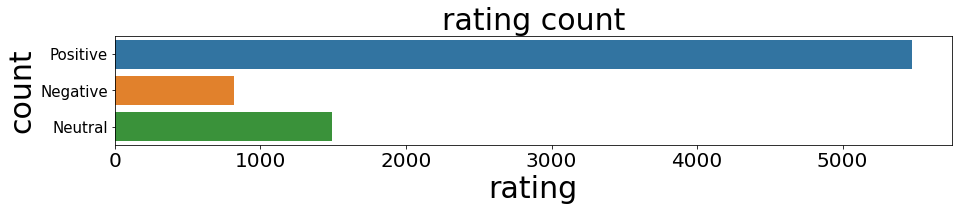

In [263]:

plt.figure(figsize=(15,2))
plt.title("rating count", fontsize=30)
plt.xlabel("rating",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
sns.barplot(x=sentiment_count, y=sentiment_labels)

## Review Cleaning

In [264]:
def remove_stopwords(text):
    result = []
    for token in text:
        if token not in custom_stopwords:
            result.append(token)
           
    return result
   
def remove_punct(text):
   
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst


def lemmatization(text):
   
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
       
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
           
        result.append(wordnet.lemmatize(token,pos))
   
    return result

In [268]:
from nltk.corpus import stopwords
df['review'] = df['review'].str.lower()
df['review']=df['review'].apply(lambda X: word_tokenize(X))

custom_stopwords = [w for w in set(stopwords.words("english"))]


df['review'] = df['review'].apply(remove_stopwords)
df['review']=df['review'].apply(lemmatization)
df['review'] = df['review'].apply(remove_punct)

In [269]:
df

,index,_id,movie_name,review,rating,label,sentiment
0,6089,614f68bfee63d6915969a60c,Short Term 12,"[see, movie, realize, academy, work, movie, n,...",10,2,Positive
1,11099,61501e96bb541ff327e496d9,The Lunchbox,"[old, say, repeat, ritesh, batra, s, charming,...",9,2,Positive
2,9528,61501e95bb541ff327e490b6,Harry Potter and the Prisoner of Azkaban,"[s, anything, movie, prove, difficulty, separa...",8,1,Neutral
3,1807,614f34b8ee63d69159699551,Whiplash,"[saw, 24, hour, ago, best, fest, sundance, las...",8,1,Neutral
4,5856,614f68bfee63d6915969a523,Airlift,"[story, must, spread, airlift, compelling, tha...",10,2,Positive
...,...,...,...,...,...,...,...
7780,3114,614f34b9ee63d69159699a6c,Kimi no na wa.,"[go, see, kimi, na, ha, without, know, anythin...",10,2,Positive
7781,3749,614f34b9ee63d69159699ce7,Memento,"[lose, memory, would, go, close, one, worst, e...",10,2,Positive
7782,6474,614f68c0ee63d6915969a78d,Black Swan,"[darren, aronofsky, prof, absolute, genius, mo...",9,2,Positive
7783,10598,61501e95bb541ff327e494e4,Bringing Up Baby,"[lot, film, 1930s, 1940s, incorrectly, refer, ...",8,1,Neutral


In [267]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\aashi
[nltk_data]     tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\aashi
[nltk_data]     tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aashi tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\aashi
[nltk_data]     tapadia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [272]:
from nltk.tokenize.treebank import TreebankWordDetokenizer        
for i in range(len(df['review'])):
    review=df['review'][i]
    review=TreebankWordDetokenizer().detokenize(review)
    df['review'][i]=review

<ipython-input-272-8166899febb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i]=review


In [273]:
df.head()

,index,_id,movie_name,review,rating,label,sentiment
0,6089,614f68bfee63d6915969a60c,Short Term 12,see movie realize academy work movie n t budge...,10,2,Positive
1,11099,61501e96bb541ff327e496d9,The Lunchbox,old say repeat ritesh batra s charming lunchbo...,9,2,Positive
2,9528,61501e95bb541ff327e490b6,Harry Potter and the Prisoner of Azkaban,s anything movie prove difficulty separate ser...,8,1,Neutral
3,1807,614f34b8ee63d69159699551,Whiplash,saw 24 hour ago best fest sundance last 24 hou...,8,1,Neutral
4,5856,614f68bfee63d6915969a523,Airlift,story must spread airlift compelling thanks la...,10,2,Positive


## Analysis By word Cloud

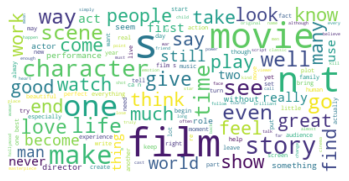

In [276]:
text = ""
for sentence in df[df['sentiment']=='Positive'].review:
    sentence=str(sentence)
    splitted=sentence.split()   
    text+=" ".join(splitted)+" " 

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_font_size=50, max_words=150).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

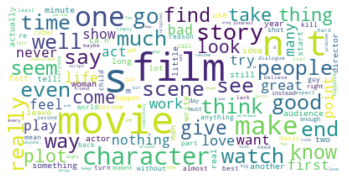

In [277]:
text = ""
for sentence in df[df['sentiment']=='Negative'].review:
    sentence=str(sentence)
    splitted=sentence.split()   
    text+=" ".join(splitted)+" " 

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_font_size=50, max_words=150).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

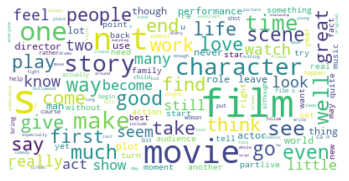

In [278]:
text = ""
for sentence in df[df['sentiment']=='Neutral'].review:
    sentence=str(sentence)
    splitted=sentence.split()   
    text+=" ".join(splitted)+" " 

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_font_size=50, max_words=150).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [281]:
test=df[df['sentiment']=='Positive']
test.head()

,index,_id,movie_name,review,rating,label,sentiment
0,6089,614f68bfee63d6915969a60c,Short Term 12,see movie realize academy work movie n t budge...,10,2,Positive
1,11099,61501e96bb541ff327e496d9,The Lunchbox,old say repeat ritesh batra s charming lunchbo...,9,2,Positive
4,5856,614f68bfee63d6915969a523,Airlift,story must spread airlift compelling thanks la...,10,2,Positive
5,2250,614f34b8ee63d6915969970c,Léon,long thought own film dvd video waste money wa...,10,2,Positive
6,4041,614f34b9ee63d69159699e0b,Alien,alien remain one original terrify movie time c...,10,2,Positive


## Vectorization feature(TF-IDF)

In [282]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [284]:
x = df['review']
y = df['sentiment']

In [285]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [286]:
x_train.shape, x_test.shape

((6228,), (1557,))

## Training the Model (KNN)

In [287]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf', KNeighborsClassifier(n_neighbors=5)),])

In [288]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [289]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [291]:
y_pred = text_clf.predict(x_test)

In [292]:
accuracy_score(y_test, y_pred)

0.7084136159280668

In [301]:
text_clf.predict(["ok,I am learning Natural Language Processing in fun fashion!"])

array(['Neutral'], dtype=object)

In [296]:
text_clf.predict(["great,thats very interesting"])

array(['Positive'], dtype=object)

In [298]:
text_clf.predict(["that's bad"])

array(['Negative'], dtype=object)

In [299]:
text_clf.predict(["Modi Goverment"])

array(['Positive'], dtype=object)

## Training the Model (Random forest)

In [303]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [304]:
text_clf1 = Pipeline([('tfidf',TfidfVectorizer()),
                     ('chi',  SelectKBest(chi2, k=100)),
                     ('clf', RandomForestClassifier())])
text_clf1.fit(x_train, y_train)
y_pred = text_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7084136159280668

In [305]:
text_clf1.predict(["ok,I am learning Natural Language Processing in fun fashion!"])

array(['Positive'], dtype=object)

In [306]:
text_clf1.predict(["that's bad"])

array(['Negative'], dtype=object)

In [307]:
text_clf1.predict(["Modi Goverment"])

array(['Positive'], dtype=object)